# Goodreads books

1. Ar knygos vertinimas priklauso nuo puslapių skaičiaus
2. Ar vartotojai daugiausia yra parašę atsiliepimų prie geriausiai vertintų knygų
3. Ar yra ryškus laikotarpis (metai) kada buvo daugiausiai išleista knygų
4. Ar yra ryškiai lyderiaujanti leidykla, kurios knygos vertinamos geriausiai

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Duomenų tvarkymas

In [97]:
books_raw = pd.read_csv('books.csv', on_bad_lines='skip')
books_raw.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


In [98]:
books_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [63]:
books_raw.describe(include='all')

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
count,11123,11123,11123.000000,11123,1.112300e+04,11123,11123.000000,1.112300e+04,11123.000000,11123,11123
unique,10348,6639,NaN,11123,NaN,27,NaN,NaN,NaN,3679,2290
top,The Iliad,Stephen King,NaN,0439785960,NaN,eng,NaN,NaN,NaN,10/1/2005,Vintage
freq,9,40,NaN,1,NaN,8908,NaN,NaN,NaN,56,318
mean,NaN,NaN,3.934075,NaN,9.759880e+12,NaN,336.405556,1.794285e+04,542.048099,NaN,NaN
std,NaN,NaN,0.350485,NaN,4.429758e+11,NaN,241.152626,1.124992e+05,2576.619589,NaN,NaN
min,NaN,NaN,0.000000,NaN,8.987060e+09,NaN,0.000000,0.000000e+00,0.000000,NaN,NaN
25%,NaN,NaN,3.770000,NaN,9.780345e+12,NaN,192.000000,1.040000e+02,9.000000,NaN,NaN
50%,NaN,NaN,3.960000,NaN,9.780582e+12,NaN,299.000000,7.450000e+02,47.000000,NaN,NaN
75%,NaN,NaN,4.140000,NaN,9.780872e+12,NaN,416.000000,5.000500e+03,238.000000,NaN,NaN


In [68]:
null_reiksmes = books_raw.isna()
null_reiksmes.sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [ ]:
books_raw.drop_duplicates()
books_raw

In [118]:
books = books_raw.drop(columns=['isbn13', 'isbn', 'bookID'])
books.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [173]:
books = books.rename(columns={'  num_pages': 'num_pages'})

In [151]:
books['publication_date'] = pd.to_datetime(books['publication_date'], errors='coerce')
books = books.drop(columns=['publication_date\t'])
books.head(2)


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.


In [139]:
author_name = books.iloc[0, 1]
author_name.split('/')[0]

'J.K. Rowling'

In [140]:
def author_name_good(author_name):
    return author_name.split('/')[0]

In [152]:
books['authors'] = books['authors'].apply(author_name_good)
books.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.


# Duomenų analizė

## Geriausiai įvertintos knygos

In [286]:
top_books = books[books['ratings_count'] > 1000000]
top_books = top_books.sort_values(by='average_rating', ascending=False)
top_books = top_books.head(15)

<AxesSubplot:xlabel='average_rating', ylabel='title'>

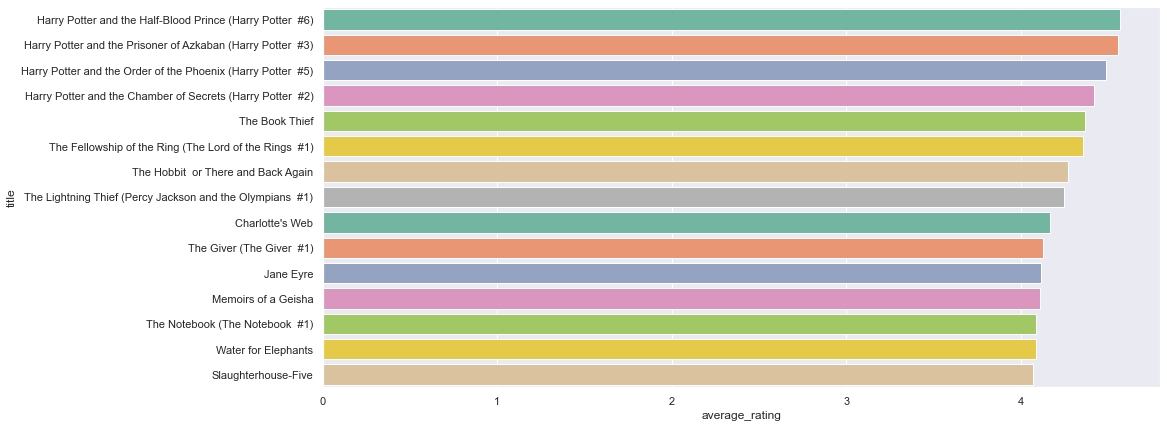

In [241]:
plt.subplots(figsize=(15,7))
sns.barplot(data=top_books, x='average_rating', y='title', palette='Set2',)


## 1. Ryšys tarp knygų įvertinimų ir puslapių skaičiaus

In [178]:
top_books['num_pages'].mean()

370.2

In [179]:
books['num_pages'].mean()

336.4055560550211

In [242]:
books['num_pages'].max()

6576

<Figure size 1080x1080 with 0 Axes>

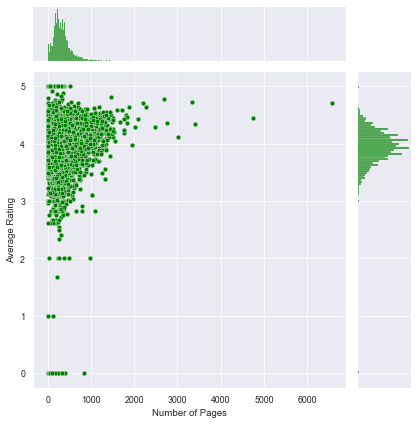

In [289]:
plt.figure(figsize=(15,15))
rating_to_pages = sns.jointplot(x='num_pages', y='average_rating', data=books, color='green')
rating_to_pages.set_axis_labels('Number of Pages', 'Average Rating')

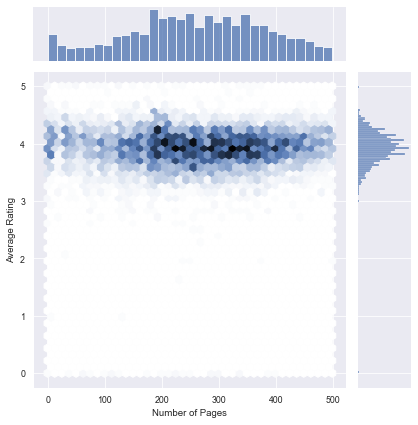

In [288]:
rating_books = books[books['num_pages'] < 500 ]

rating_to_pages = sns.jointplot(x='num_pages', y='average_rating', data=rating_books, kind='hex')
rating_to_pages.set_axis_labels('Number of Pages', 'Average Rating')


Dažniausiai geriausiai vertinamos knygos turi vidutinį skaičių puslapių 190-330. Panašu, kad labai plonos ar labai storos knygos nėra taip gerai vertinamos. Geriausiai vertinamų 15-likos knygų vidutinis puslapių kiekis yra 370, tai net šiek tiek viršija parametrus matomus diagramoje viršuje.

# 2. Ar vartotojai daugiausia yra parašę atsiliepimų prie geriausiai vertintų knygų